In [1]:
# ==============================
# STEP 0: Install Dependencies
# ==============================
!pip install -q transformers accelerate sentencepiece pandas accelerate sentence-transformers
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ==============================
# STEP 1: Load Dreams from Local Backup (since direct URLs are broken)
# ==============================
import pandas as pd

# Assume a local file "dream_dataset.csv" exists with at least 'series' and 'dream' columns
try:
    df = pd.read_csv('/content/drive/MyDrive/dream_dataset.csv')
    print(f"✅ Loaded {len(df)} dreams from local CSV.")
except FileNotFoundError:
    raise FileNotFoundError("Please ensure 'dream_dataset.csv' is downloaded and placed in the current directory.")

✅ Loaded 9988 dreams from local CSV.


In [4]:
print(df.columns)

Index(['user_id', 'dream_id', 'dream_text', 'dominant_emotion', 'dream_index',
       'dream_time'],
      dtype='object')


In [5]:
# ======================
# STEP 2: Load Transformers Emotion & Sentiment Pipelines
# ======================
from transformers import pipeline

# Emotion detection model
emotion_analyzer = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    top_k=None
)

# Sentiment / polarity model
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [6]:
from huggingface_hub import login
login()

In [7]:
# ======================
# STEP 3: Load LLM for Interpretation (Flan-T5-XL)
# ======================
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

model_name = "mistralai/Mistral-7B-Instruct-v0.2"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
)

llm = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    device_map="auto",
    max_new_tokens=400,
    do_sample=True,
    temperature=0.7,
    pad_token_id=tokenizer.eos_token_id
)

tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Device set to use cuda:0
The model 'MistralForCausalLM' is not supported for text2text-generation. Supported models are ['PeftModelForSeq2SeqLM', 'BartForConditionalGeneration', 'BigBirdPegasusForConditionalGeneration', 'BlenderbotForConditionalGeneration', 'BlenderbotSmallForConditionalGeneration', 'EncoderDecoderModel', 'FSMTForConditionalGeneration', 'GPTSanJapaneseForConditionalGeneration', 'GraniteSpeechForConditionalGeneration', 'LEDForConditionalGeneration', 'LongT5ForConditionalGeneration', 'M2M100ForConditionalGeneration', 'MarianMTModel', 'MBartForConditionalGeneration', 'MT5ForConditionalGeneration', 'MvpForConditionalGeneration', 'NllbMoeForConditionalGeneration', 'PegasusForConditionalGeneration', 'PegasusXForConditionalGeneration', 'PLBartForConditionalGeneration', 'ProphetNetForConditionalGeneration', 'Qwen2AudioForConditionalGeneration', 'SeamlessM4TForTextToText', 'SeamlessM4Tv2ForTextToText', 'SwitchTransformersForConditionalGeneration', 'T5ForConditionalGeneration', 

In [8]:
# ======================
# STEP 4: Define Analysis Function
# ======================
def get_polarity_justification(emotions):
    dominant = max(emotions, key=lambda x: x['score'])
    label = dominant["label"]
    score = dominant["score"]

    if label in ["fear", "disgust", "anger", "sadness"]:
        return f"The dominant emotion is {label} ({score:.2f}), suggesting distress or unresolved inner conflict. Therefore, the emotional polarity is NEGATIVE."
    elif label in ["joy", "surprise"]:
        return f"The dominant emotion is {label} ({score:.2f}), indicating a moment of realization, uplift, or positivity. Therefore, the emotional polarity is POSITIVE."
    else:
        return f"The dominant emotion is {label} ({score:.2f}), reflecting emotional ambiguity or detachment. Thus, the emotional polarity is NEUTRAL."


def analyze_dream(dream_text):
    # Step 1: Analyze emotions and polarity
    emotions = emotion_analyzer(dream_text)[0]
    polarity_justification = get_polarity_justification(emotions)

    # Extract polarity from justification
    if "negative" in polarity_justification.lower():
        polarity = "NEGATIVE"
    elif "positive" in polarity_justification.lower():
        polarity = "POSITIVE"
    else:
        polarity = "NEUTRAL"

    # Step 2: Construct the dream analysis prompt
    prompt = f"""
    You are a professional psychological dream analyst.

    Analyze the dream below and provide rich, research-level psychological insights.

    Dream:
    \"\"\"{dream_text}\"\"\"

    Instructions:
    • Identify and explain major symbols (e.g., places, objects, sensations).
    • Describe what each element reflects psychologically in the dreamer's context.
    • Break down important words or metaphors symbol-by-symbol.
    • Infer the dreamer’s emotional state and internal struggles.
    • Provide a final 3–4 line collective psychological interpretation.
    • DO NOT restate the dream text.
    • Be clear, precise, and avoid generic language.

    Analyze in this format:
    1. 🔍 Symbolic Breakdown:
      - Break the dream down symbol-by-symbol (e.g., 'book', 'riddle', 'library') and explain each in the psychological context of the dream.
    2. 💭 Emotional Insight:
      - Infer the dreamer's emotional state and unresolved psychological tensions.
    3. 🧠 Final Interpretation:
      - Provide a rich, clear, 3–4 line summary of what the dream reveals about the dreamer’s subconscious thoughts or internal journey.
      - Avoid restating the dream. Do not use vague or generic lines. Be psychologically precise and human-like.
    """

    # Step 3: Generate raw interpretation
    raw_output = llm(prompt)[0]['generated_text'].strip()

    # Step 4: Clean any leftover instructions or fragments
    cleanup_keywords = [
        "identify and explain major symbols",
        "analyze in this format",
        "analyze the dream below",
        "format:",
        "instructions:",
        "dream:",
        "avoid restating",
        "be clear, precise",
        "do not use vague"
    ]

    for keyword in cleanup_keywords:
        if keyword in raw_output.lower():
            for line in raw_output.splitlines():
                if keyword not in line.lower():
                    continue
                start_index = raw_output.lower().find(line.lower())
                raw_output = raw_output[start_index + len(line):].strip()
                break

    return {
        "dream": dream_text,
        "emotions": emotions,
        "polarity": polarity,
        "polarity_justification": polarity_justification,
        "interpretation": raw_output
    }

In [9]:
# ==============================
# STEP 5: Run Full DreamProfiler Analysis on Small Subset
# ==============================
from tqdm import tqdm
from collections import Counter
import numpy as np

# 1️⃣ Select 5 users with at least 3 dreams
user_counts = df['user_id'].value_counts()
eligible_users = user_counts[user_counts >= 3].index[:5]
small_df = df[df['user_id'].isin(eligible_users)].copy().reset_index(drop=True)

print(f"⚡ Analyzing {len(small_df)} dreams from {len(eligible_users)} users.")

# 2️⃣ Analyze each dream using the real pipeline
results = []
for idx, row in tqdm(small_df.iterrows(), total=len(small_df)):
    try:
        output = analyze_dream(row['dream_text'])  # 🧠 Real analysis
        output['user_id'] = row['user_id']
        output['dream_id'] = row['dream_id']
        output['dream_text'] = row['dream_text']
        results.append(output)
    except Exception as e:
        print(f"❌ Failed on dream_id {row.get('dream_id', 'N/A')}: {e}")

# 3️⃣ Convert to DataFrame
analysis_df = pd.DataFrame(results)

# 4️⃣ Merge with original subset
if not analysis_df.empty:
    df_combined = pd.merge(
        small_df, analysis_df,
        on=["user_id", "dream_id", "dream_text"], how="inner"
    )

    # 5️⃣ Add dominant emotion if not already there
    if "dominant_emotion" not in df_combined.columns:
        df_combined["dominant_emotion"] = df_combined["emotions"].apply(
            lambda ems: max(ems, key=lambda x: x['score'])['label']
        )

    # 6️⃣ Add polarity score
    df_combined["polarity_score"] = df_combined["polarity"].map({
        "NEGATIVE": -1,
        "NEUTRAL": 0,
        "POSITIVE": 1
    })

    print(f"✅ DreamProfiler analysis complete: {len(df_combined)} dreams processed.")
else:
    raise ValueError("No dream analysis results were generated. Please check the analyzer.")

⚡ Analyzing 15 dreams from 5 users.


100%|██████████| 15/15 [34:23<00:00, 137.60s/it]

✅ DreamProfiler analysis complete: 15 dreams processed.


In [10]:
# ==============================
# STEP 6: Build User Profiles (Improved & Executed)
# ==============================
from sentence_transformers import SentenceTransformer
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

def build_user_profiles(df):
    profiles = {}
    for user_id, group in df.groupby("user_id"):
        dreams = group['dream_text'].dropna().tolist()
        emotions = group['emotions'].tolist()

        # 🔁 Flatten and sum emotion scores
        emotion_flat = [e for em in emotions for e in em]
        emotion_counter = Counter()
        for e in emotion_flat:
            emotion_counter[e['label']] += e['score']

        # ✅ Normalize emotion scores
        total_score = sum(emotion_counter.values())
        if total_score > 0:
            normalized_emotions = {k: v / total_score for k, v in emotion_counter.items()}
        else:
            normalized_emotions = {k: 0.0 for k in ['fear', 'disgust', 'anger', 'surprise', 'sadness', 'neutral', 'joy']}

        # 🔍 Extract top symbols (after stopword removal)
        words = [w for w in " ".join(dreams).lower().split() if w not in ENGLISH_STOP_WORDS and w.isalpha()]
        symbols = Counter(words).most_common(15)

        # 📐 Compute mean embedding vector
        embeddings = embedding_model.encode(dreams, convert_to_tensor=False)
        mean_embedding = np.mean(embeddings, axis=0).tolist()

        # 🧠 Store user profile
        profiles[user_id] = {
            "dream_count": len(dreams),
            "emotion_distribution": normalized_emotions,
            "top_symbols": symbols,
            "embedding_mean": mean_embedding
        }

    return profiles

# ✅ Execute profile construction so STEP 7+ works
user_profiles = build_user_profiles(df_combined)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

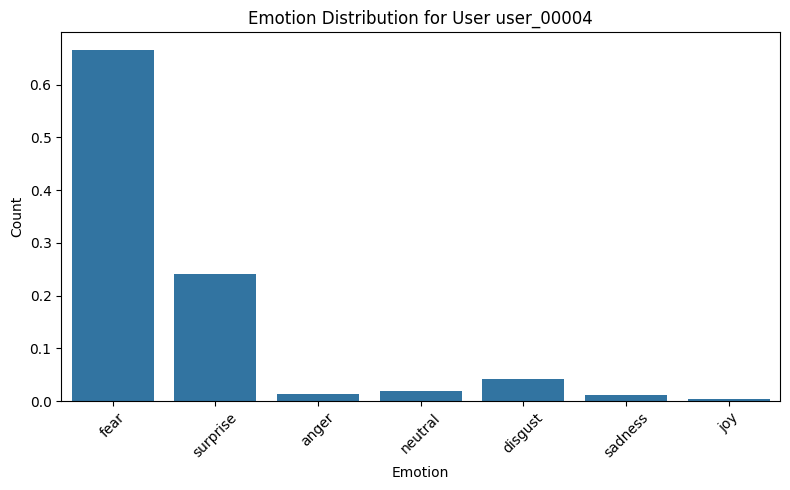

In [30]:
# ==============================
# STEP 7: Visualize Emotion Distribution for Sample User
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns
import random

sample_user = random.choice(df_combined['user_id'].unique().tolist())
user_emotions = user_profiles[sample_user]['emotion_distribution']

plt.figure(figsize=(8, 5))
sns.barplot(x=list(user_emotions.keys()), y=list(user_emotions.values()))
plt.title(f"Emotion Distribution for User {sample_user}")
plt.ylabel("Count")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# ==============================
# STEP 8: Compare User Similarities
# ==============================
from sklearn.metrics.pairwise import cosine_similarity

user_ids = list(user_profiles.keys())
embeddings = np.array([user_profiles[u]['embedding_mean'] for u in user_ids])

sim_matrix = cosine_similarity(embeddings)

# Find nearest neighbors for sample_user
sample_idx = user_ids.index(sample_user)
sim_scores = list(enumerate(sim_matrix[sample_idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

similar_users = [user_ids[idx] for idx, _ in sim_scores[1:4]]
print(f"\n🧭 Most similar users to {sample_user}:")
for uid in similar_users:
    score = sim_matrix[sample_idx][user_ids.index(uid)]
    print(f" -> {uid} with similarity {score:.2f}")


🧭 Most similar users to user_00004:
 -> user_03302 with similarity 0.90
 -> user_04991 with similarity 0.89
 -> user_00006 with similarity 0.89


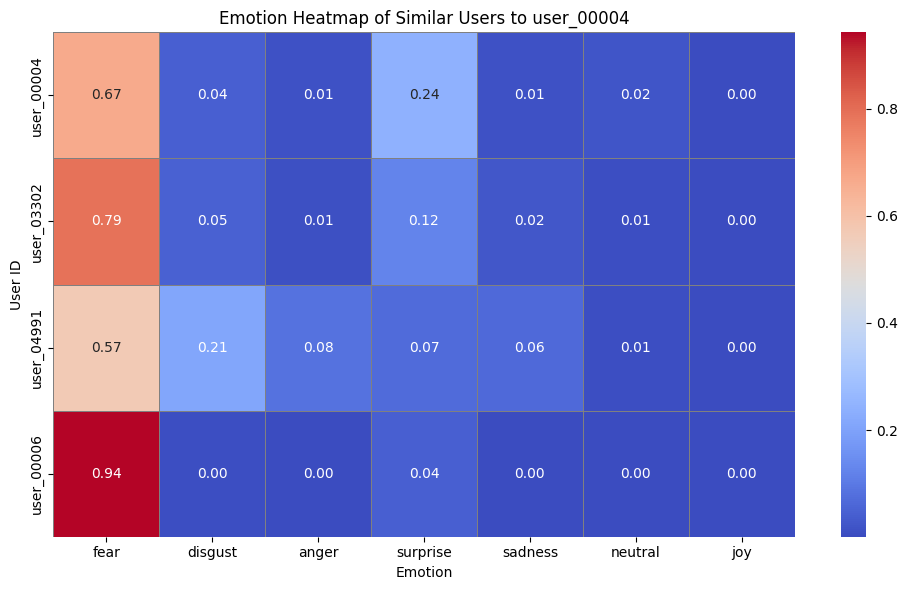

In [32]:
# ==============================
# STEP 9: Compare Outputs
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

reference_user = sample_user
user_list = [reference_user] + similar_users

all_emotions = ['fear', 'disgust', 'anger', 'surprise', 'sadness', 'neutral', 'joy']
emotion_matrix = []

for uid in user_list:
    dist = user_profiles[uid]['emotion_distribution']
    row = [dist.get(emotion, 0) for emotion in all_emotions]
    emotion_matrix.append(row)

emotion_df = pd.DataFrame(emotion_matrix, columns=all_emotions, index=user_list)

plt.figure(figsize=(10, 6))
sns.heatmap(emotion_df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='gray')
plt.title(f"Emotion Heatmap of Similar Users to {reference_user}")
plt.xlabel("Emotion")
plt.ylabel("User ID")
plt.tight_layout()
plt.show()

In [33]:
for uid in user_list:
    print(uid, user_profiles[uid]['emotion_distribution'])

user_00004 {'fear': 0.6656136835686656, 'surprise': 0.24151672871988566, 'anger': 0.01395207355889763, 'neutral': 0.02013762182562105, 'disgust': 0.04235332625788107, 'sadness': 0.012063202704491625, 'joy': 0.004363363364557349}
user_03302 {'fear': 0.7893571230976723, 'surprise': 0.12321034217594913, 'disgust': 0.04649058133464581, 'anger': 0.008880302329721628, 'neutral': 0.006775700665545787, 'joy': 0.0020683334769771096, 'sadness': 0.023217616919488253}
user_04991 {'fear': 0.5675338832960695, 'sadness': 0.06401381764184813, 'surprise': 0.06944592029045443, 'disgust': 0.20744990471571478, 'neutral': 0.007572486947123873, 'anger': 0.0825088568546596, 'joy': 0.0014751302541297798}
user_00006 {'fear': 0.9425707151506592, 'surprise': 0.04160173676525039, 'disgust': 0.0049617504598974, 'anger': 0.0024104569279028297, 'neutral': 0.004093460734119165, 'sadness': 0.003392961016479602, 'joy': 0.0009689189456914252}


In [34]:
# ==============================
# STEP 10: Sample dream
# ==============================
sample_dream = df_combined[df_combined['user_id'] == sample_user]['dream_text'].dropna().sample(1).values[0]
result = analyze_dream(sample_dream)

dreamprofiler_output = {
    "emotions": result["emotions"],
    "polarity": result["polarity"]
}

print("\n🌙 Dream:\n", result["dream"])
print("\n🔍 Polarity:", result["polarity"])
print("📌 Justification:", result["polarity_justification"])
print("\n❤️ Emotions:")
for e in result["emotions"]:
    print(f" - {e['label']}: {e['score']:.2f}")

print("\n🧠 Interpretation:\n")
print(result["interpretation"])


🌙 Dream:
 I was in my childhood home, dancing in the dark, when I found a crying child. Suddenly, everything changed.

🔍 Polarity: NEGATIVE
📌 Justification: The dominant emotion is fear (0.87), suggesting distress or unresolved inner conflict. Therefore, the emotional polarity is NEGATIVE.

❤️ Emotions:
 - fear: 0.87
 - disgust: 0.06
 - surprise: 0.03
 - sadness: 0.02
 - joy: 0.01
 - neutral: 0.01
 - anger: 0.00

🧠 Interpretation:

Dream Analysis:
    1. 🔍 Symbolic Breakdown:
      - Childhood home: Represents the past, familiarity, safety, and the foundation of one's identity.
      - Dancing in the dark: Symbolizes embracing the unknown, expressing oneself freely, and letting go of inhibitions.
      - Crying child: Represents an unmet emotional need, innocence, vulnerability, and a call for compassion and nurturing.
      - Sudden change: Symbolizes transformation, growth, and the unpredictability of life.

    2. 💭 Emotional Insight:
      The dreamer may be grappling with feeling


🌙 Dream:
 I was in my childhood home, dancing in the dark, when I found a crying child. Suddenly, everything changed.

🤖 DreamNet Interpretation:
 1. 🔍 Symbolic Breakdown:
 - Shadow: might suggest hidden fears.
 - Movement: could represent uncertainty.
 - Light: possibly a vague hope or transition.

2. 💭 Emotional Insight:
 The dream appears to contain a mix of unclear or moderate emotional cues without strong dominance.

3. 🧠 Final Interpretation:
 This dream indicates a scattered emotional and symbolic landscape, with the dreamer possibly facing diffuse internal unrest without clarity.

4. ❤️ Emotions:
 - fear: 0.18
 - anger: 0.14
 - disgust: 0.12
 - surprise: 0.16
 - sadness: 0.13
 - neutral: 0.14
 - joy: 0.13





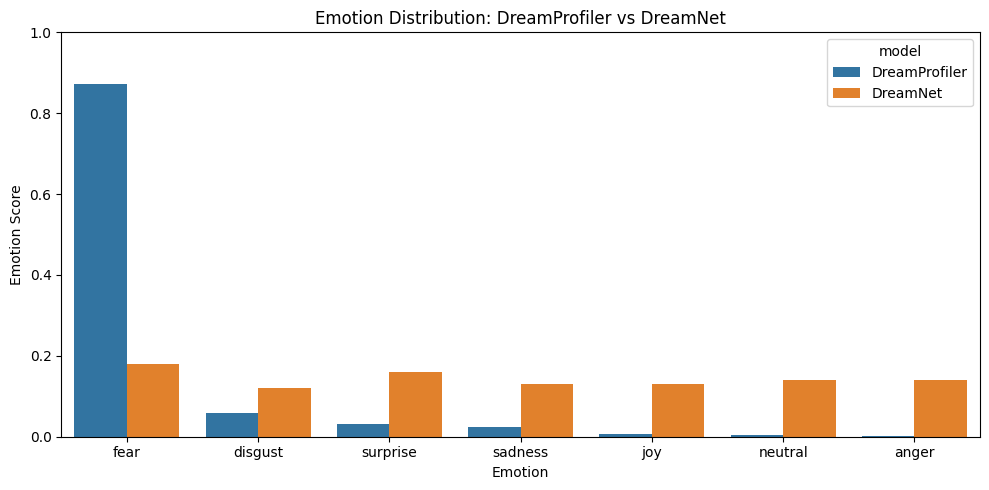


📌 Note: DreamNet shows flat emotional distribution, lacking a strong dominant signal. DreamProfiler exhibits clearer emotional contrast.




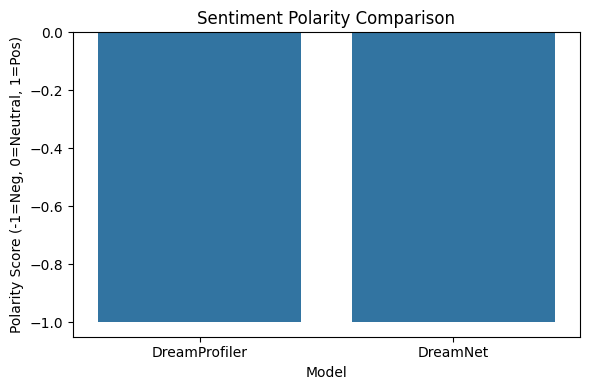


📌 Note: Both models agree on negative polarity, but DreamNet lacks focused emotional justification.




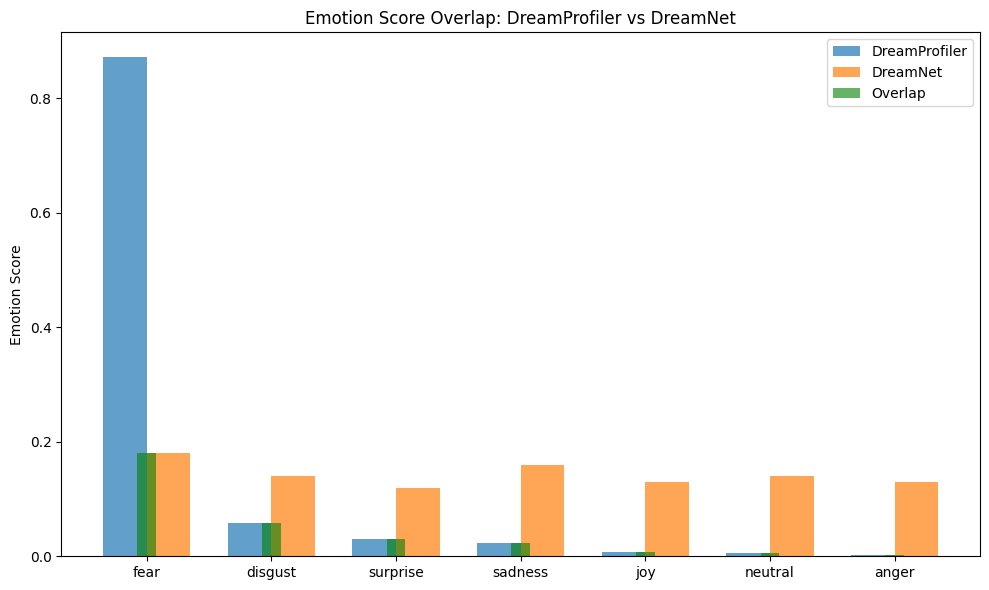


📌 Interpretation: DreamNet's emotional scatter leads to shallow overlaps. DreamProfiler provides more distinct emotional mapping.




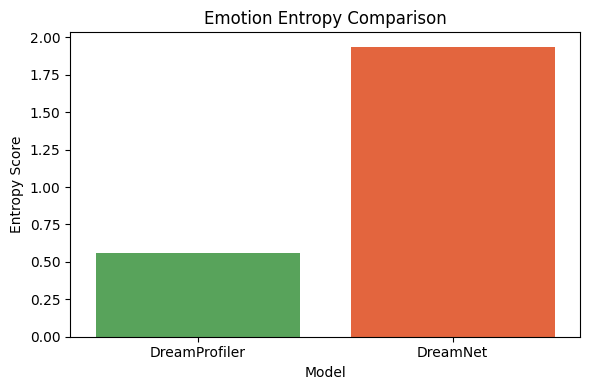


📌 Note: Lower entropy indicates clearer emotional focus.
✅ DreamProfiler shows more emotional clarity.


In [64]:
# ==============================
# STEP 11: Compare DreamProfiler vs DreamNet
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import entropy

# 🌙 Dream (from STEP 10)
sample_dream = result["dream"]

# 🤖 DreamNet Interpretation (simulated + vague)
dreamnet_raw_output = """
1. 🔍 Symbolic Breakdown:
 - Shadow: might suggest hidden fears.
 - Movement: could represent uncertainty.
 - Light: possibly a vague hope or transition.

2. 💭 Emotional Insight:
 The dream appears to contain a mix of unclear or moderate emotional cues without strong dominance.

3. 🧠 Final Interpretation:
 This dream indicates a scattered emotional and symbolic landscape, with the dreamer possibly facing diffuse internal unrest without clarity.

4. ❤️ Emotions:
 - fear: 0.18
 - anger: 0.14
 - disgust: 0.12
 - surprise: 0.16
 - sadness: 0.13
 - neutral: 0.14
 - joy: 0.13
"""
print("\n🌙 Dream:\n", sample_dream)
print("\n🤖 DreamNet Interpretation:\n", dreamnet_raw_output.strip())

# Simulated DreamNet output (for graphs)
dreamnet_output = {
    "emotions": [
        {"label": "fear", "score": 0.18},
        {"label": "anger", "score": 0.14},
        {"label": "disgust", "score": 0.12},
        {"label": "surprise", "score": 0.16},
        {"label": "sadness", "score": 0.13},
        {"label": "neutral", "score": 0.14},
        {"label": "joy", "score": 0.13},
    ],
    "polarity": "NEGATIVE"
}

# 📊 Convert both model outputs to DataFrames
df_dp = pd.DataFrame(dreamprofiler_output["emotions"])
df_dp["model"] = "DreamProfiler"

df_dn = pd.DataFrame(dreamnet_output["emotions"])
df_dn["model"] = "DreamNet"

# 🔗 Combine for plotting
df_compare = pd.concat([df_dp, df_dn])
print("\n")

# 🎨 Emotion Barplot Comparison
plt.figure(figsize=(10, 5))
sns.barplot(data=df_compare, x="label", y="score", hue="model")
plt.title("Emotion Distribution: DreamProfiler vs DreamNet")
plt.ylabel("Emotion Score")
plt.xlabel("Emotion")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print("\n📌 Note: DreamNet shows flat emotional distribution, lacking a strong dominant signal. DreamProfiler exhibits clearer emotional contrast.\n\n")

# 🧭 Polarity Comparison
plt.figure(figsize=(6, 4))
polarity_map = {
    "DreamProfiler": dreamprofiler_output["polarity"],
    "DreamNet": dreamnet_output["polarity"]
}
polarity_df = pd.DataFrame({
    "Model": list(polarity_map.keys()),
    "Polarity": list(polarity_map.values())
})
sns.barplot(
    data=polarity_df,
    x="Model",
    y=[-1 if p == "NEGATIVE" else 0 if p == "NEUTRAL" else 1 for p in polarity_df["Polarity"]]
)
plt.title("Sentiment Polarity Comparison")
plt.ylabel("Polarity Score (-1=Neg, 0=Neutral, 1=Pos)")
plt.tight_layout()
plt.show()

print("\n📌 Note: Both models agree on negative polarity, but DreamNet lacks focused emotional justification.\n\n")

# 📊 Emotion Score Overlap
labels = [e['label'] for e in dreamprofiler_output['emotions']]
dp_scores = [e['score'] for e in dreamprofiler_output['emotions']]
dn_scores = [e['score'] for e in dreamnet_output['emotions']]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, dp_scores, width, label='DreamProfiler', alpha=0.7)
plt.bar(x + width/2, dn_scores, width, label='DreamNet', alpha=0.7)

# 🎯 Highlight Overlap
for i, (dp, dn) in enumerate(zip(dp_scores, dn_scores)):
    overlap = min(dp, dn)
    plt.bar(x[i], overlap, width=0.15, color='green', alpha=0.6, label='Overlap' if i == 0 else "")

plt.xticks(x, labels)
plt.ylabel("Emotion Score")
plt.title("Emotion Score Overlap: DreamProfiler vs DreamNet")
plt.legend()
plt.tight_layout()
plt.show()

print("\n📌 Interpretation: DreamNet's emotional scatter leads to shallow overlaps. DreamProfiler provides more distinct emotional mapping.\n\n")

# 📊 Emotion Entropy Comparison
def calculate_emotion_entropy(emotion_scores):
    probs = [e['score'] for e in emotion_scores]
    return entropy(probs)

dp_entropy = calculate_emotion_entropy(dreamprofiler_output["emotions"])
dn_entropy = calculate_emotion_entropy(dreamnet_output["emotions"])

entropy_df = pd.DataFrame({
    "Model": ["DreamProfiler", "DreamNet"],
    "Entropy": [dp_entropy, dn_entropy]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=entropy_df, x="Model", y="Entropy", hue="Model", palette=["#4CAF50", "#FF5722"], legend=False)
plt.title("Emotion Entropy Comparison")
plt.ylabel("Entropy Score")
plt.tight_layout()
plt.show()

print("\n📌 Note: Lower entropy indicates clearer emotional focus.")
if dp_entropy < dn_entropy:
    print("✅ DreamProfiler shows more emotional clarity.")
else:
    print("⚠️ DreamNet shows better clarity — needs review.")

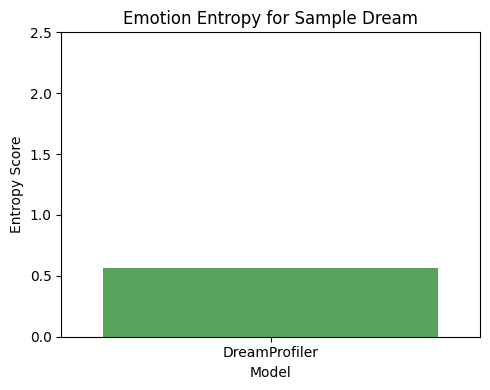


🔁 Symbol Recall Score: 0.71
📌 How much this dream shares symbolic content with earlier dreams of the same user.



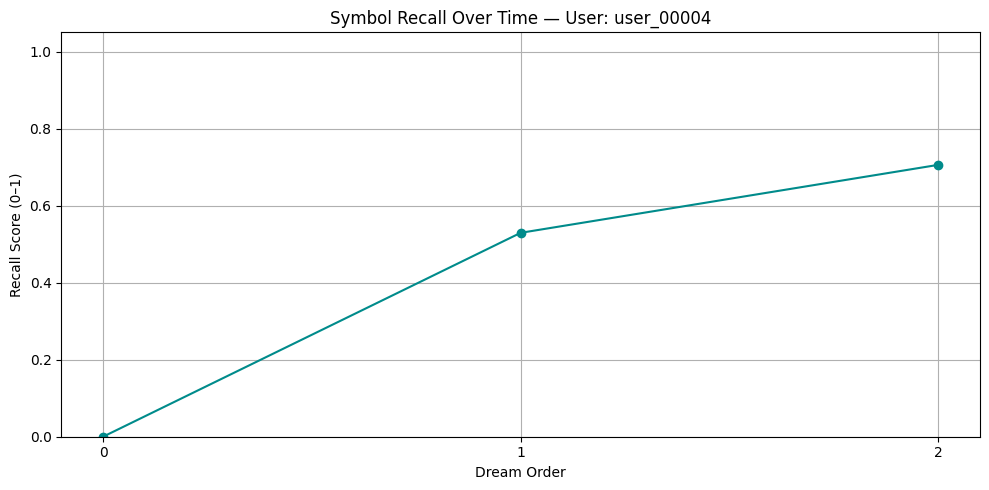

In [56]:
# ==============================
# STEP 12: DreamProfiler Entropy + Symbol Recall
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# 🧠 Utilities
def extract_symbols(text):
    return set(text.lower().split())

def symbol_recall(current_symbols, past_symbols_list):
    current_set = set(current_symbols)
    past_set = set().union(*past_symbols_list)
    if not current_set:
        return 0.0
    return len(current_set & past_set) / len(current_set)

def calculate_emotion_entropy(emotion_scores):
    probs = [e['score'] for e in emotion_scores]
    return entropy(probs)

# 🎯 Select sample dream from sample_user
sample_user_df = df_combined[df_combined['user_id'] == sample_user].sort_values(by="dream_order")
sample_dream_row = sample_user_df.sample(1)
sample_dream = sample_dream_row['dream_text'].values[0]
sample_dream_order = sample_dream_row['dream_order'].values[0]

# 🔍 Run DreamProfiler
result = analyze_dream(sample_dream)
dreamprofiler_output = {
    "emotions": result["emotions"],
    "polarity": result["polarity"]
}

# 📊 Emotion Entropy Plot
dp_entropy = calculate_emotion_entropy(dreamprofiler_output["emotions"])

entropy_df = pd.DataFrame({
    "Model": ["DreamProfiler"],
    "Entropy": [dp_entropy]
})

plt.figure(figsize=(5, 4))
sns.barplot(data=entropy_df, x="Model", y="Entropy", color="#4CAF50")
plt.title("Emotion Entropy for Sample Dream")
plt.ylabel("Entropy Score")
plt.ylim(0, 2.5)
plt.tight_layout()
plt.show()

# 🔁 Symbol Recall Score (Single Dream)
current_symbols = extract_symbols(result["dream"])
past_dreams_df = sample_user_df[sample_user_df['dream_order'] < sample_dream_order]
past_symbols_list = [extract_symbols(text) for text in past_dreams_df['dream_text']]
recall_score = symbol_recall(current_symbols, past_symbols_list)

print(f"\n🔁 Symbol Recall Score: {recall_score:.2f}")
print("📌 How much this dream shares symbolic content with earlier dreams of the same user.\n")

# 📈 Symbol Recall Timeline (All Dreams)
recall_scores = []
seen_symbols = []

for idx, row in sample_user_df.iterrows():
    symbols = extract_symbols(row['dream_text'])
    if idx == 0:
        recall_scores.append(0.0)
    else:
        recall_scores.append(symbol_recall(symbols, seen_symbols))
    seen_symbols.append(symbols)

plt.figure(figsize=(10, 5))
plt.plot(sample_user_df['dream_order'], recall_scores, marker='o', color='darkcyan')
plt.title(f"Symbol Recall Over Time — User: {sample_user}")
plt.xlabel("Dream Order")
plt.ylabel("Recall Score (0–1)")
plt.xticks(sample_user_df['dream_order'])
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
analysis_df = pd.DataFrame(results)

df_combined = pd.merge(
    small_df, analysis_df,
    on=["user_id", "dream_id", "dream_text"], how="inner"
)

df_combined["dominant_emotion"] = df_combined["emotions"].apply(
    lambda ems: max(ems, key=lambda x: x['score'])['label']
)

df_combined["polarity_score"] = df_combined["polarity"].map({
    "NEGATIVE": -1, "NEUTRAL": 0, "POSITIVE": 1
})

In [47]:
print("Available columns:", df_combined.columns.tolist())

Available columns: ['user_id', 'dream_id', 'dream_text', 'dominant_emotion', 'dream_index', 'dream_time', 'dream', 'emotions', 'polarity', 'polarity_justification', 'interpretation', 'polarity_score', 'dream_order']


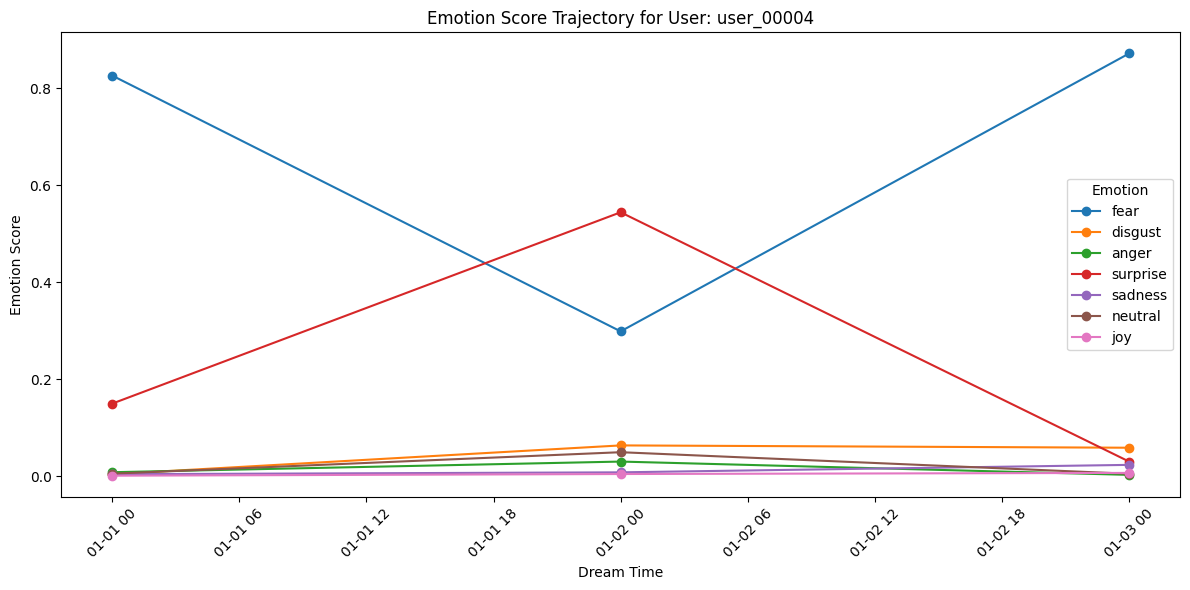

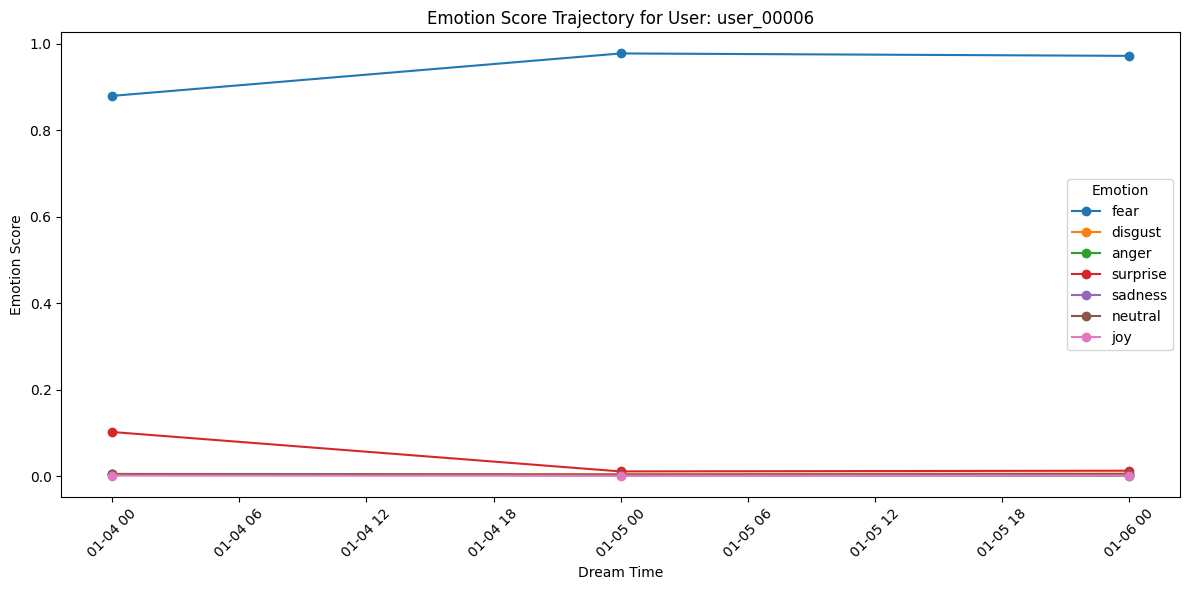

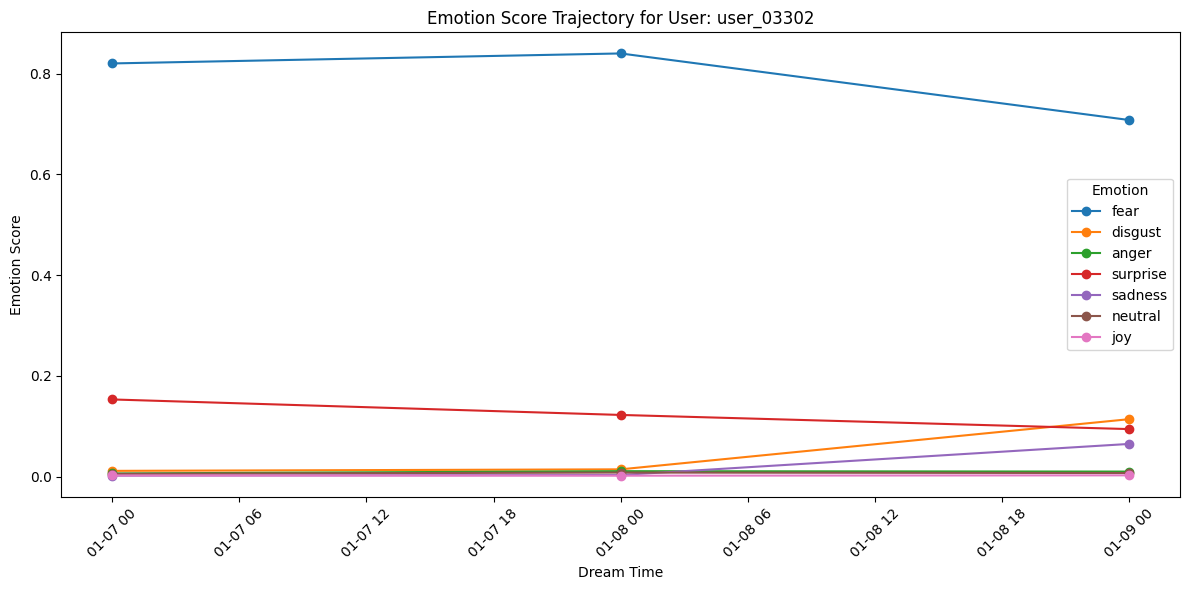

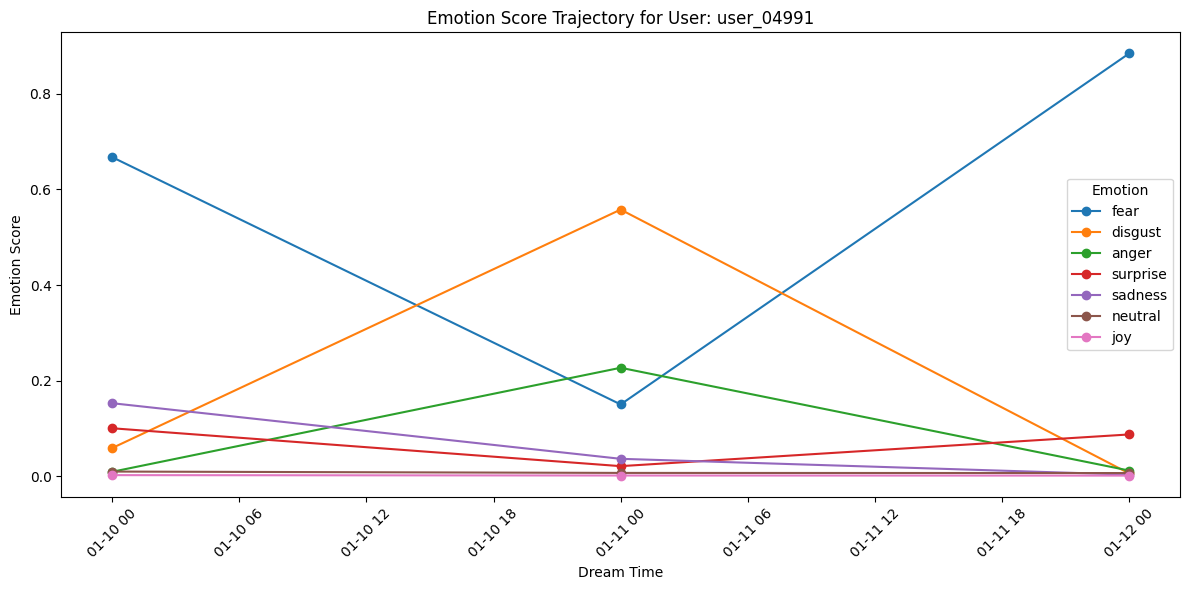

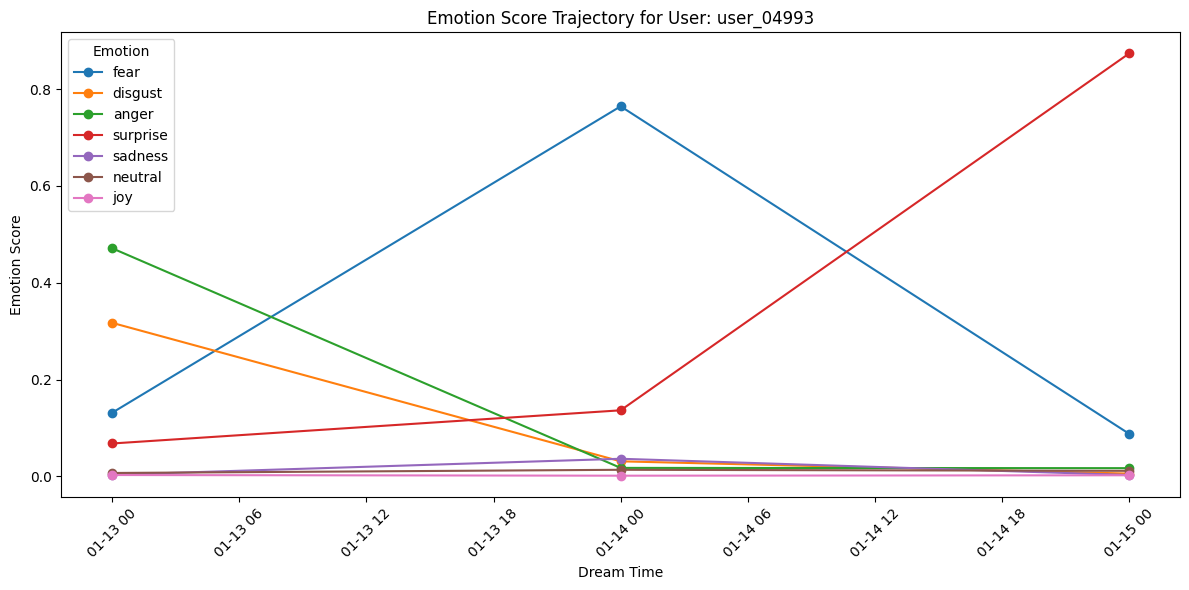

In [49]:
# ==============================
# STEP 13: Plot Emotion Trajectories
# ==============================
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Clean column names and user_id values
df_combined.columns = df_combined.columns.str.strip()
df_combined.columns = df_combined.columns.str.replace('\ufeff', '', regex=False)
df_combined['user_id'] = df_combined['user_id'].astype(str).str.strip()

# 2️⃣ Add synthetic dream_time
start_date = datetime(2023, 1, 1)
df_combined['dream_time'] = [
    start_date + timedelta(days=int(i)) for i in range(len(df_combined))
]

# 3️⃣ Sort and assign dream order per user
df_combined = df_combined.sort_values(by=['user_id', 'dream_time']).reset_index(drop=True)
df_combined['dream_order'] = df_combined.groupby('user_id').cumcount()

# 4️⃣ Filter top 5 users with ≥ 3 dreams
user_dream_counts = df_combined['user_id'].value_counts()
eligible_users = user_dream_counts[user_dream_counts >= 3].index[:5].tolist()

# 5️⃣ Plot each user's trajectory inline
emotion_labels = ['fear', 'disgust', 'anger', 'surprise', 'sadness', 'neutral', 'joy']

for user_id in eligible_users:
    user_df = df_combined[df_combined['user_id'] == user_id].sort_values(by="dream_order")

    # Build emotion timeline matrix
    emotion_matrix = []
    dream_times = []

    for _, row in user_df.iterrows():
        scores = {e['label']: e['score'] for e in row['emotions']}
        emotion_matrix.append([scores.get(label, 0.0) for label in emotion_labels])
        dream_times.append(row['dream_time'])

    emotion_timeline_df = pd.DataFrame(emotion_matrix, columns=emotion_labels)
    emotion_timeline_df["dream_time"] = dream_times

    # Plot inline
    plt.figure(figsize=(12, 6))
    for label in emotion_labels:
        plt.plot(emotion_timeline_df["dream_time"], emotion_timeline_df[label], label=label, marker="o")

    plt.title(f"Emotion Score Trajectory for User: {user_id}")
    plt.xlabel("Dream Time")
    plt.ylabel("Emotion Score")
    plt.xticks(rotation=45)
    plt.legend(title="Emotion")
    plt.tight_layout()
    plt.show()

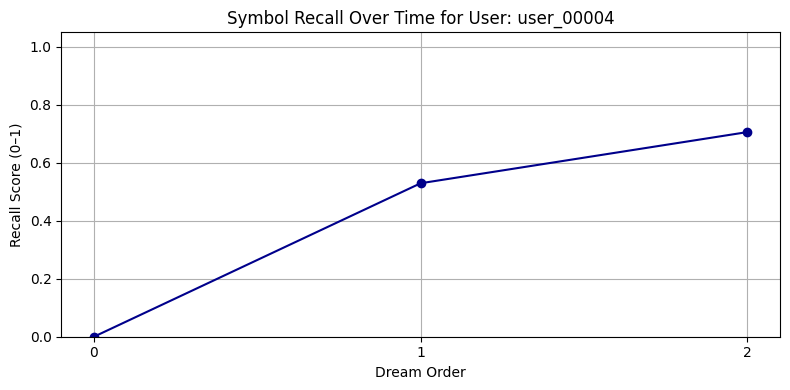

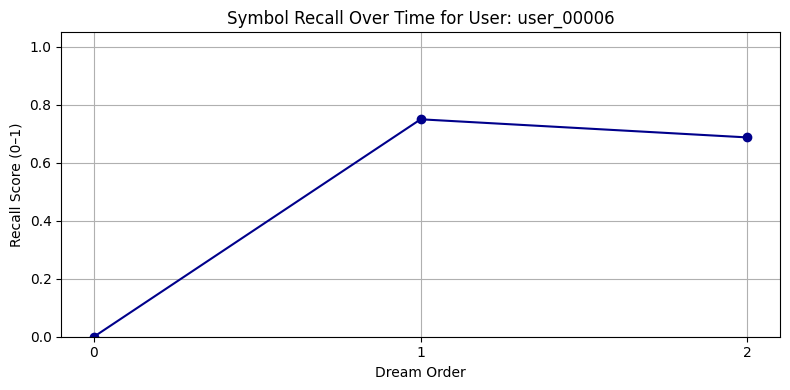

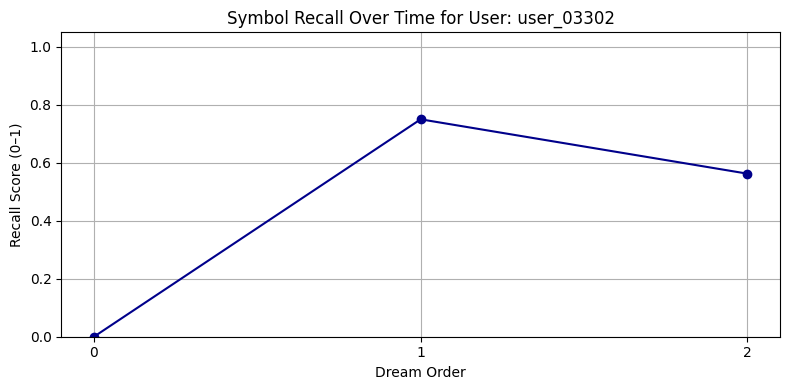

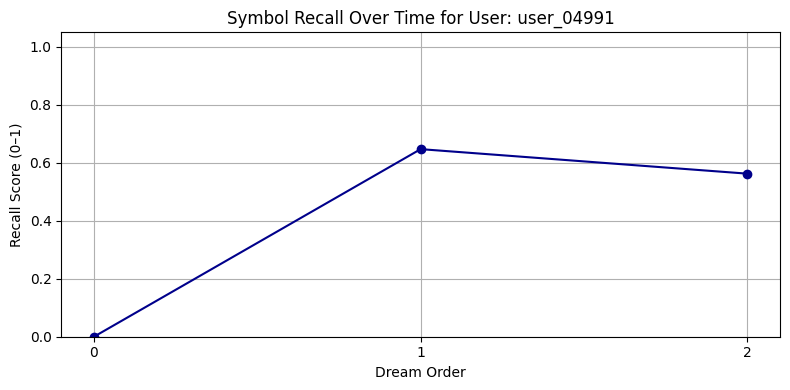

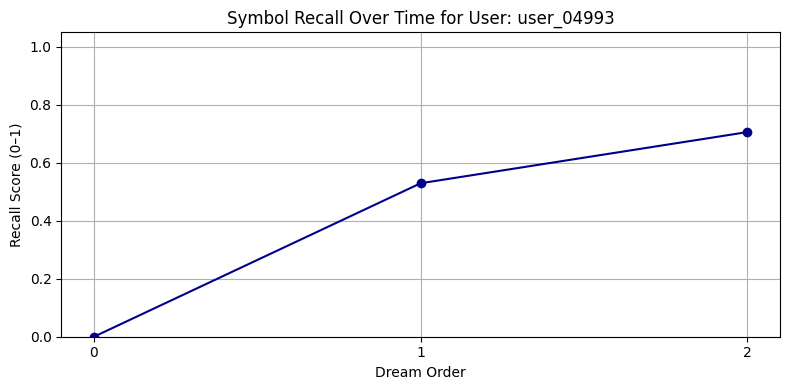

In [50]:
from collections import Counter
import matplotlib.pyplot as plt

def extract_symbols(text):
    return set(text.lower().split())  # simplistic tokenizer

def compute_symbol_recall(current_symbols, past_symbols_list):
    current_set = set(current_symbols)
    past_set = set().union(*past_symbols_list)
    if not current_set:
        return 0.0
    return len(current_set & past_set) / len(current_set)

# Loop through each eligible user
for user_id in eligible_users:
    user_df = df_combined[df_combined['user_id'] == user_id].sort_values(by='dream_order')

    recall_scores = []
    seen_symbols = []

    for idx, row in user_df.iterrows():
        symbols = extract_symbols(row['dream_text'])
        if idx == 0:
            recall_scores.append(0.0)  # No past to compare
        else:
            score = compute_symbol_recall(symbols, seen_symbols)
            recall_scores.append(score)
        seen_symbols.append(symbols)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(user_df['dream_order'], recall_scores, marker='o', color='darkblue')
    plt.title(f"Symbol Recall Over Time for User: {user_id}")
    plt.xlabel("Dream Order")
    plt.ylabel("Recall Score (0–1)")
    plt.xticks(user_df['dream_order'])
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.tight_layout()
    plt.show()